In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv("kolkata_restaurants.csv")

In [3]:
dataset.head()

,name,ratings,location1,location2,est. bill amt.,cuisine1,cuisine2,cuisine3
0,Pawan Putra,4.2,Kankurgachhi,East Kolkata,"1,700 for 2 (approx)",Chinese,North Indian,Continental
1,Danish Restaurant,4.4,Machuabazar,North Kolkata,500 for 2 (approx),Mughlai,North Indian,NaN
2,The Sugarr and Spice,3.5,Maniktala,North Kolkata,300 for 2 (approx),Desserts,Fast Food,NaN
3,Monginis,NaN,Kankurgachhi,East Kolkata,400 for 2 (approx),Desserts,Fast Food,NaN
4,Krazy For Chocolates,NaN,Kankurgachhi,East Kolkata,500 for 2 (approx),Desserts,NaN,NaN


In [4]:
dataset.isnull().sum()

name                 0
ratings           6909
location1            0
location2            0
est. bill amt.       0
cuisine1            63
cuisine2          1720
cuisine3          4875
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8046 entries, 0 to 8045
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8046 non-null   object 
 1   ratings         1137 non-null   float64
 2   location1       8046 non-null   object 
 3   location2       8046 non-null   object 
 4   est. bill amt.  8046 non-null   object 
 5   cuisine1        7983 non-null   object 
 6   cuisine2        6326 non-null   object 
 7   cuisine3        3171 non-null   object 
dtypes: float64(1), object(7)
memory usage: 503.0+ KB


In [6]:
df = dataset.dropna()
df

,name,ratings,location1,location2,est. bill amt.,cuisine1,cuisine2,cuisine3
0,Pawan Putra,4.2,Kankurgachhi,East Kolkata,"1,700 for 2 (approx)",Chinese,North Indian,Continental
8,Chai Break - Kankurgachi,4.4,Kankurgachhi,East Kolkata,800 for 2 (approx),Chinese,Italian,Mexican
10,Go Green,4.1,Kankurgachhi,East Kolkata,"1,200 for 2 (approx)",Italian,North Indian,Chinese
15,The Tunnel,4.2,Kankurgachhi,East Kolkata,800 for 2 (approx),Chinese,North Indian,Continental
16,ChaiApps,3.5,Phool Bagan,North Kolkata,400 for 2 (approx),Continental,Italian,Fast Food
...,...,...,...,...,...,...,...,...
6640,Jadu Kadai,3.6,Behala,South Kolkata,600 for 2 (approx),North Indian,Mughlai,Chinese
7031,Chilli Garlic,3.6,Behala,South Kolkata,600 for 2 (approx),Chinese,Tibetan,Seafood
7391,The Glass House,4.0,Barasat,24 Parganas North,700 for 2 (approx),Chinese,Continental,North Indian
7590,Dada Boudi Restaurant,4.3,Barrackpore,24 Parganas North,550 for 2 (approx),Biryani,North Indian,Chinese


In [7]:
df.describe()

,ratings
count,491.000000
mean,4.068839
std,0.253036
min,3.500000
25%,3.900000
50%,4.100000
75%,4.300000
max,4.400000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 8037
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            491 non-null    object 
 1   ratings         491 non-null    float64
 2   location1       491 non-null    object 
 3   location2       491 non-null    object 
 4   est. bill amt.  491 non-null    object 
 5   cuisine1        491 non-null    object 
 6   cuisine2        491 non-null    object 
 7   cuisine3        491 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.5+ KB


In [9]:
df.shape

(491, 8)

In [10]:
df.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned data saved to 'cleaned_dataset.csv'")


Cleaned data saved to 'cleaned_dataset.csv'


In [11]:
data = df

1. Based on the data provided, which areas of Kolkata show the highest
potential for a new cafe focused on bakery items and beverages? 

In [12]:
data['bill_amount'] = data['est. bill amt.'].str.replace(',', '').str.extract('(\d+)').astype(float)

# Display the cleaned 'bill_amount' column with the first few entries to verify
data[['location1', 'location2', 'bill_amount']].head()

C:\Users\haric\AppData\Local\Temp\ipykernel_14348\3547034954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bill_amount'] = data['est. bill amt.'].str.replace(',', '').str.extract('(\d+)').astype(float)


,location1,location2,bill_amount
0,Kankurgachhi,East Kolkata,1700.0
8,Kankurgachhi,East Kolkata,800.0
10,Kankurgachhi,East Kolkata,1200.0
15,Kankurgachhi,East Kolkata,800.0
16,Phool Bagan,North Kolkata,400.0


Consider
competition density, foot traffic, and average customer spending. What
is the most profitable place to start SV Cafe?

In [37]:
# Identifying bakery/dessert establishments based on cuisine columns
bakery_cuisines = ['Desserts', 'Bakery']

# Filter dataset for cafes offering bakery/dessert items
bakery_data = data[
    data[['cuisine1', 'cuisine2', 'cuisine3']].apply(lambda row: any(cuisine in bakery_cuisines for cuisine in row), axis=1)
]

# Calculate competition density, average spending, and average ratings by location2 (broader area level)
location_analysis = bakery_data.groupby('location2').agg(
    competition_density=('name', 'size'),        # Number of bakeries/dessert cafes
    avg_spending=('bill_amount', 'mean'),        # Average spending for 2 people
    avg_rating=('ratings', 'mean')               # Average customer rating
).sort_values(by=['competition_density', 'avg_spending', 'avg_rating'], ascending=[True, False, False])

# Display the results
location_analysis.reset_index()

,location2,competition_density,avg_spending,avg_rating
0,Salt Lake,1,1200.000000,4.10
1,Jadavpur,1,1000.000000,4.30
2,West Kolkata,1,800.000000,4.30
3,Santoshpur,1,800.000000,3.50
4,East Kolkata,1,500.000000,3.70
5,New Market,1,500.000000,3.70
6,B B D Bagh,2,900.000000,4.20
7,24 Parganas North,2,850.000000,4.20
8,Central Kolkata,2,550.000000,4.05
9,South Kolkata,9,688.888889,4.00


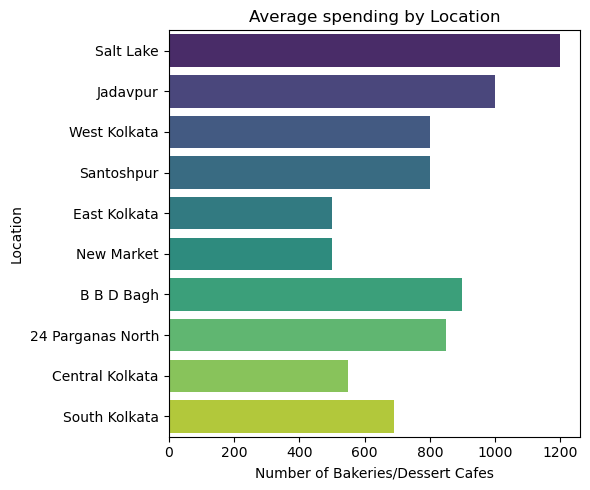

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index if needed
location_analysis = location_analysis.reset_index()

# Create the barplot
plt.figure(figsize=(6, 5))
sns.barplot(data=location_analysis, x='avg_spending', y='location2', palette='viridis')
plt.title('Average spending by Location')
plt.xlabel('Number of Bakeries/Dessert Cafes')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


2. What are the top 3 most popular cuisines in Kolkata?

In [44]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame and `all_cuisines` is already flattened
all_cuisines = data[['cuisine1', 'cuisine2', 'cuisine3']].values.flatten()
cuisine_counts = Counter(cuisine for cuisine in all_cuisines if pd.notnull(cuisine))
top_cuisines = cuisine_counts.most_common(3)
top_cuisines


[('Chinese', 318), ('North Indian', 307), ('Continental', 207)]

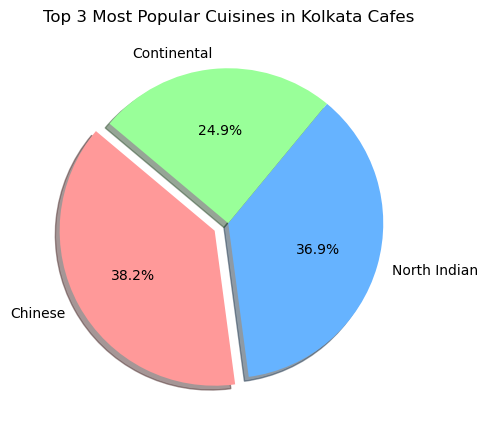

In [46]:
# Data preparation
top_cuisines_labels = [cuisine[0] for cuisine in top_cuisines]
top_cuisines_counts = [cuisine[1] for cuisine in top_cuisines]

# Pie chart creation
plt.figure(figsize=(5,6))
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors
explode = (0.1, 0, 0)  # Highlight the most popular cuisine

plt.pie(
    top_cuisines_counts, 
    labels=top_cuisines_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=colors, 
    shadow=True
)

# Adding a title
plt.title('Top 3 Most Popular Cuisines in Kolkata Cafes')
plt.show()



 How does the
demand for bakery items, soft drinks, and handmade beverages compare to
other food categories? Provide data-driven insights.

In [22]:
# Defining bakery and beverage categories
bakery_beverages_cuisines = ['Desserts', 'Bakery', 'Beverages']

# Filtering dataset for cafes offering bakery/beverage items
bakery_beverages_data = data[
    data[['cuisine1', 'cuisine2', 'cuisine3']].apply(lambda row: any(cuisine in bakery_beverages_cuisines for cuisine in row), axis=1)
]

# Analyzing product performance: average ratings and bill amounts for each bakery/beverage cuisine
# Extracting cuisines that are in the bakery/beverage category across cuisine1, cuisine2, and cuisine3
product_performance = pd.concat([
    bakery_beverages_data[['cuisine1', 'bill_amount', 'ratings']].rename(columns={'cuisine1': 'product'}),
    bakery_beverages_data[['cuisine2', 'bill_amount', 'ratings']].rename(columns={'cuisine2': 'product'}),
    bakery_beverages_data[['cuisine3', 'bill_amount', 'ratings']].rename(columns={'cuisine3': 'product'})
])

# Filtering again to ensure only bakery and beverage-related items are analyzed
product_performance = product_performance[product_performance['product'].isin(bakery_beverages_cuisines)]

# Aggregating by product to calculate average price and rating
product_analysis = product_performance.groupby('product').agg(
    avg_price=('bill_amount', 'mean'),
    avg_rating=('ratings', 'mean'),
    total_entries=('product', 'size')
).sort_values(by=['total_entries', 'avg_price', 'avg_rating'], ascending=[False, False, False])

# Displaying the results
product_analysis.reset_index()

,product,avg_price,avg_rating,total_entries
0,Beverages,874.390244,4.063415,41
1,Desserts,742.857143,4.023810,21


3. How are cafes offering bakery items and beverages performing in the
current market? Which products are most successful, and how are they
priced? Provide an analysis of product-specific performance.

In [23]:
# Filter for cafes offering bakery items or beverages
cafes = df[
    (df['cuisine1'].str.contains('Bakery|Beverages', na=False)) |
    (df['cuisine2'].str.contains('Bakery|Beverages', na=False)) |
    (df['cuisine3'].str.contains('Bakery|Beverages', na=False))
]

# Clean and extract numeric values from 'est. bill amt.'
cafes['est. bill amt.'] = cafes['est. bill amt.'].astype(str).str.extract(r'(\d+)', expand=False)

# Convert extracted values to numeric, coercing errors to NaN (in case of invalid values)
cafes['est. bill amt.'] = pd.to_numeric(cafes['est. bill amt.'], errors='coerce')

# Calculate average ratings and average estimated bill amount for cafes
avg_rating = cafes['ratings'].mean()
avg_bill_amt = cafes['est. bill amt.'].mean()

# Analyze product-specific performance (cuisines offered)
cuisine_performance = pd.concat(
    [cafes['cuisine1'], cafes['cuisine2'], cafes['cuisine3']]
).value_counts()

# Extract top-performing products
top_products = cuisine_performance.head(10)

# Analyze price range of top products
price_range = {
    product: cafes[
        (cafes['cuisine1'] == product) |
        (cafes['cuisine2'] == product) |
        (cafes['cuisine3'] == product)
    ]['est. bill amt.'].agg(['min', 'max', 'mean'])
    for product in top_products.index
}

# Output results
print("Cafes offering bakery items and beverages:")
print(f"Average Rating: {avg_rating:.2f}")
print(f"Average Estimated Bill Amount: ₹{avg_bill_amt:.2f}\n")

print("Top 10 Products Offered by Cafes:")
print(top_products)

print("\nPrice Range of Top Products:")
for product, stats in price_range.items():
    print(f"{product}: Min ₹{stats['min']}, Max ₹{stats['max']}, Avg ₹{stats['mean']:.2f}")


Cafes offering bakery items and beverages:
Average Rating: 4.06
Average Estimated Bill Amount: ₹874.39

Top 10 Products Offered by Cafes:
Beverages        41
Fast Food        22
Chinese          15
Continental      10
Italian           9
Desserts          7
North Indian      5
Bengali           3
Street Food       2
Modern Indian     1
Name: count, dtype: int64

Price Range of Top Products:
Beverages: Min ₹350.0, Max ₹1500.0, Avg ₹874.39
Fast Food: Min ₹500.0, Max ₹1500.0, Avg ₹795.45
Chinese: Min ₹500.0, Max ₹1500.0, Avg ₹840.00
Continental: Min ₹700.0, Max ₹1500.0, Avg ₹1070.00
Italian: Min ₹500.0, Max ₹1000.0, Avg ₹855.56
Desserts: Min ₹500.0, Max ₹900.0, Avg ₹642.86
North Indian: Min ₹600.0, Max ₹1500.0, Avg ₹1300.00
Bengali: Min ₹600.0, Max ₹900.0, Avg ₹766.67
Street Food: Min ₹350.0, Max ₹600.0, Avg ₹475.00
Modern Indian: Min ₹1200.0, Max ₹1200.0, Avg ₹1200.00


C:\Users\haric\AppData\Local\Temp\ipykernel_14348\2435038753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafes['est. bill amt.'] = cafes['est. bill amt.'].astype(str).str.extract(r'(\d+)', expand=False)
C:\Users\haric\AppData\Local\Temp\ipykernel_14348\2435038753.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafes['est. bill amt.'] = pd.to_numeric(cafes['est. bill amt.'], errors='coerce')


4. Identify emerging food and beverage trends in the cafe industry in
Kolkata. Based on the data, what can SV Cafe anticipate in terms of
customer preferences for their product categories?

In [24]:
# Clean the dataset for analysis
# 1. Ensure 'est. bill amt.' is treated as a string and handle missing values
df['est. bill amt.'] = df['est. bill amt.'].astype(str)

# 2. Extract numerical values and convert to float
df['est. bill amt.'] = df['est. bill amt.'].str.extract(r'(\d+(?:,\d+)*)')[0]
df['est. bill amt.'] = df['est. bill amt.'].str.replace(',', '', regex=True).astype(float)

# 3. Combine all cuisine columns into a single list for trend analysis
cuisine_columns = ['cuisine1', 'cuisine2', 'cuisine3']
all_cuisines = pd.Series(df[cuisine_columns].values.ravel()).dropna()

# 4. Group and count cuisine popularity
cuisine_trends = all_cuisines.value_counts()

# 5. Analyze ratings for customer preferences
rating_summary = df['ratings'].describe()

# 6. Identify top locations for bakery, soft drinks, and beverages
popular_items = ['Desserts', 'Bakery', 'Beverages']
item_trends = df[cuisine_columns].isin(popular_items).sum(axis=1)
location_trends = df.loc[item_trends > 0, 'location2'].value_counts()

# Display results
print("Top 10 Cuisines in Kolkata:")
print(cuisine_trends.head(10))

print("\nCustomer Ratings Summary:")
print(rating_summary)

print("\nTop Locations for Bakery and Beverages:")
print(location_trends.head(10))

Top 10 Cuisines in Kolkata:
Chinese         318
North Indian    307
Continental     207
Italian         111
Fast Food        96
Asian            62
Mughlai          55
Beverages        41
Bengali          36
Finger Food      35
Name: count, dtype: int64

Customer Ratings Summary:
count    491.000000
mean       4.068839
std        0.253036
min        3.500000
25%        3.900000
50%        4.100000
75%        4.300000
max        4.400000
Name: ratings, dtype: float64

Top Locations for Bakery and Beverages:
location2
South Kolkata        22
East Kolkata         10
Central Kolkata       6
Salt Lake             3
24 Parganas North     3
B B D Bagh            2
New Market            2
Ballygunge            2
North Kolkata         1
Rajarhat              1
Name: count, dtype: int64


C:\Users\haric\AppData\Local\Temp\ipykernel_14348\414199632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est. bill amt.'] = df['est. bill amt.'].astype(str)
C:\Users\haric\AppData\Local\Temp\ipykernel_14348\414199632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est. bill amt.'] = df['est. bill amt.'].str.extract(r'(\d+(?:,\d+)*)')[0]
C:\Users\haric\AppData\Local\Temp\ipykernel_14348\414199632.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
,

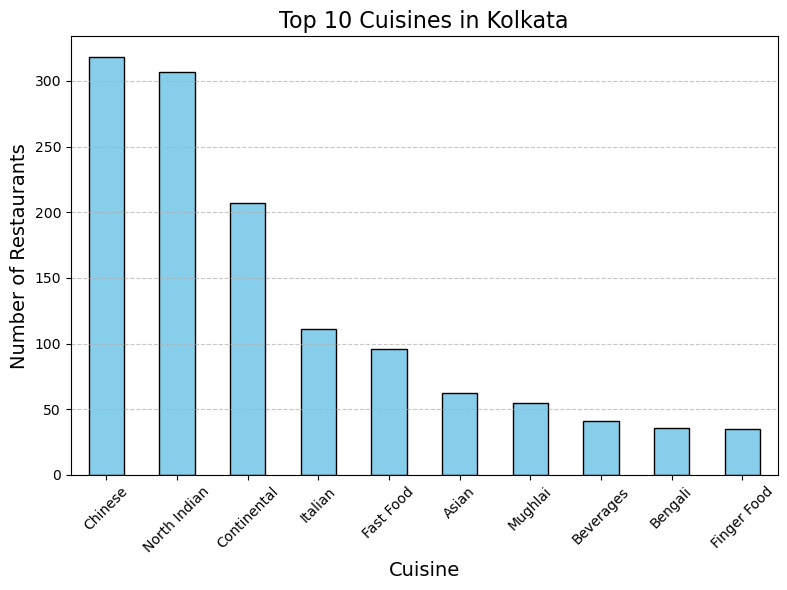

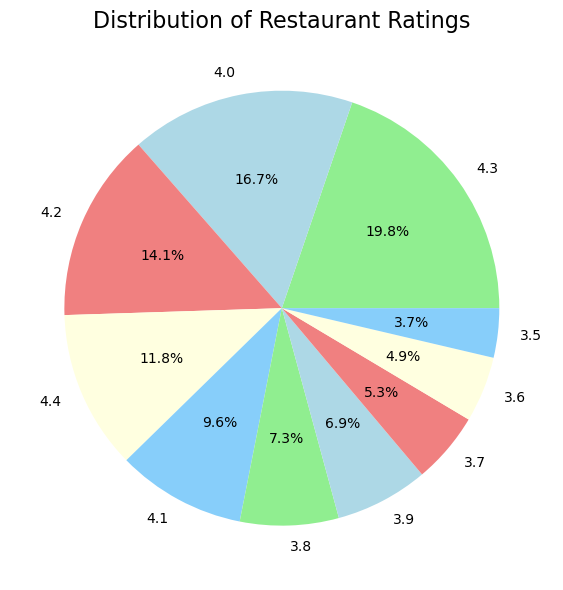

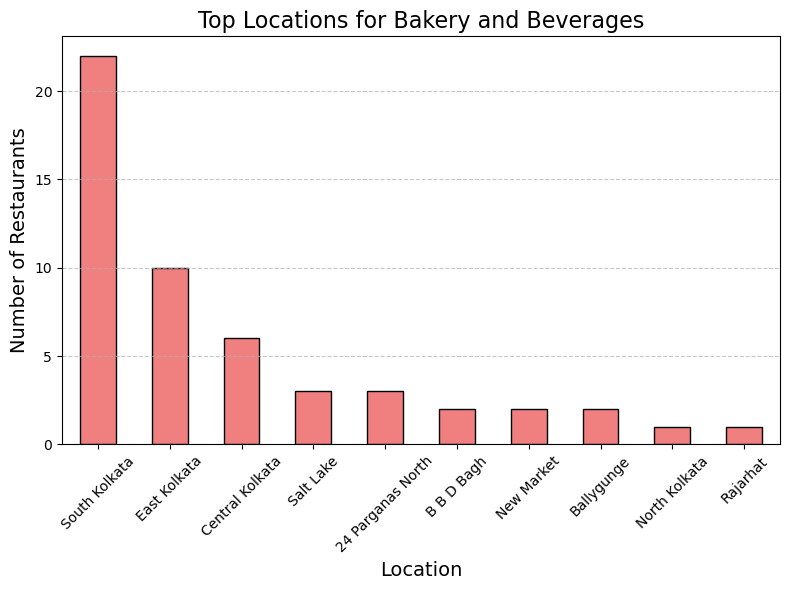

In [25]:
# Visualization
import matplotlib.pyplot as plt

# Visualization: Top 10 Cuisines
plt.figure(figsize=(8, 6))
cuisine_trends.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cuisines in Kolkata', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Assuming df['ratings'] contains the ratings data
rating_counts = df['ratings'].dropna().value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'lightcoral', 'lightyellow', 'lightskyblue'])
plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.ylabel('')  # Hide the y-axis label since it's not needed for a pie chart
plt.tight_layout()
plt.show()

# Visualization: Popular Locations for Bakery/Beverages
plt.figure(figsize=(8, 6))
location_trends.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top Locations for Bakery and Beverages', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


5. Based on your analysis, recommend the best place to start SV Cafe
and suggest an optimal product strategy that leverages popular trends
and offers a competitive advantage.

In [26]:
# Identify the best location
# Focus on locations with high counts for bakery, beverages, and desserts
best_locations = location_trends.head(3)
best_location_name = best_locations.idxmax()

# Analyze price range for competitive pricing
price_summary = df['est. bill amt.'].describe()

# Summarize top cuisines to define product strategy
top_cuisines = cuisine_trends.head(5)

# Summarize findings and recommendations
recommendations = {
    "Best Location": best_location_name,
    "Popular Cuisines": top_cuisines.index.tolist(),
    "Average Bill Amount (Competitive Pricing)": {
        "Mean": price_summary['mean'],
        "25th Percentile (Lower Range)": price_summary['25%'],
        "75th Percentile (Upper Range)": price_summary['75%']
    },
    "Rating Benchmark": {
        "Average Rating": rating_summary['mean'],
        "Top Rating": rating_summary['max']
    }
}

# Print recommendations
print("Recommendations for SV Cafe:")
for key, value in recommendations.items():
    print(f"{key}: {value}")


Recommendations for SV Cafe:
Best Location: South Kolkata
Popular Cuisines: ['Chinese', 'North Indian', 'Continental', 'Italian', 'Fast Food']
Average Bill Amount (Competitive Pricing): {'Mean': 1201.1466395112016, '25th Percentile (Lower Range)': 800.0, '75th Percentile (Upper Range)': 1500.0}
Rating Benchmark: {'Average Rating': 4.068839103869654, 'Top Rating': 4.4}
